<a href="https://colab.research.google.com/github/sivaa2308/ML-Projects/blob/main/Notebooks/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
sns.set()


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sivashaji","key":"b210f9c5cddc58423314ce8942efc200"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d keerthiperumal/104reallife-examplecsv


Dataset URL: https://www.kaggle.com/datasets/keerthiperumal/104reallife-examplecsv
License(s): unknown
104reallife-examplecsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip 104reallife-examplecsv.zip


Archive:  104reallife-examplecsv.zip
replace 1.04. Real-life example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
raw_data = pd.read_csv("1.04. Real-life example.csv")

In [ ]:
raw_data.isna().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0
Model,0


In [ ]:
no_model=raw_data.drop('Model',axis=1)

In [ ]:
no_model.isna().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


In [ ]:
no_nan=no_model.dropna(axis=0)
no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


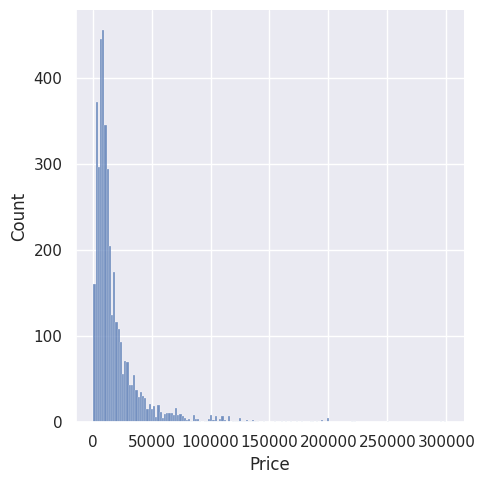

In [ ]:
sns.displot(no_nan['Price'])

In [ ]:
upper_limit=no_nan['Price'].quantile(0.99)
data1=no_nan[no_nan['Price']< upper_limit]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


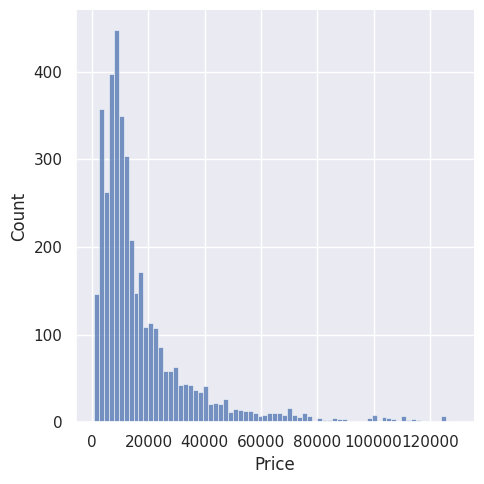

In [ ]:
sns.displot(data1['Price'])

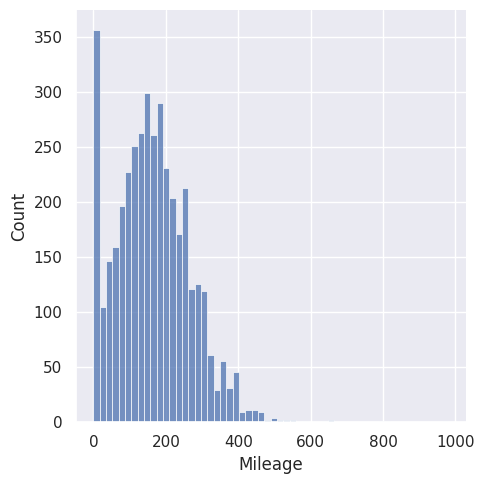

In [ ]:
sns.displot(no_nan['Mileage'])

In [ ]:
upper_mileage=data1['Mileage'].quantile(0.99)
upper_mileage
data2=data1[data1['Mileage']<upper_mileage]


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3944 non-null   object 
 1   Price         3944 non-null   float64
 2   Body          3944 non-null   object 
 3   Mileage       3944 non-null   int64  
 4   EngineV       3944 non-null   float64
 5   Engine Type   3944 non-null   object 
 6   Registration  3944 non-null   object 
 7   Year          3944 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 277.3+ KB


In [ ]:
upper_mileage

np.float64(435.5100000000002)

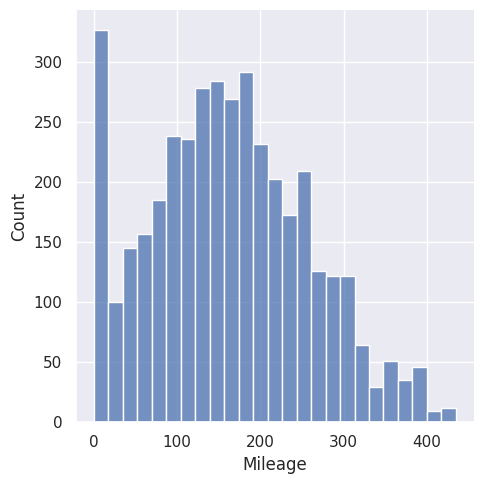

In [ ]:
sns.displot(data2['Mileage'])

In [ ]:
no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [ ]:
upper_engine=no_nan['EngineV'].quantile(0.99)
data3=data2[data2['EngineV']<6.5]
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3921 non-null   object 
 1   Price         3921 non-null   float64
 2   Body          3921 non-null   object 
 3   Mileage       3921 non-null   int64  
 4   EngineV       3921 non-null   float64
 5   Engine Type   3921 non-null   object 
 6   Registration  3921 non-null   object 
 7   Year          3921 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 275.7+ KB


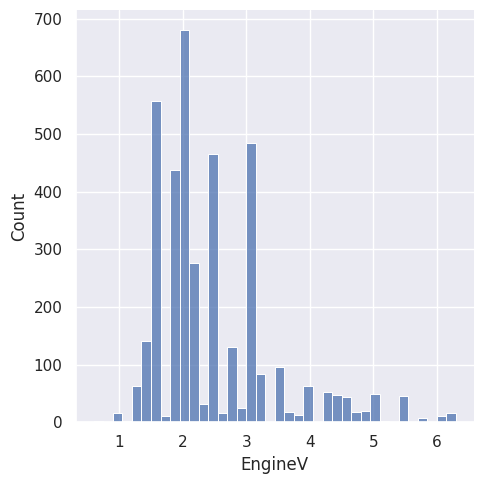

In [ ]:
sns.displot(data3['EngineV'])

In [ ]:
upper_year=no_nan['Year'].quantile(0.01)
data4=data3[data3['Year']>upper_year]
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3867 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Price         3867 non-null   float64
 2   Body          3867 non-null   object 
 3   Mileage       3867 non-null   int64  
 4   EngineV       3867 non-null   float64
 5   Engine Type   3867 non-null   object 
 6   Registration  3867 non-null   object 
 7   Year          3867 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.9+ KB


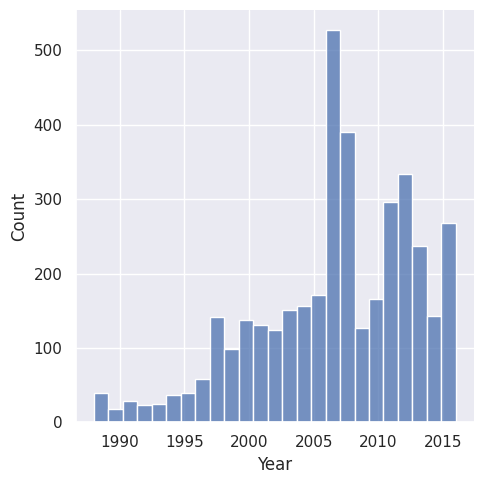

In [ ]:
sns.displot(data4['Year'])

In [ ]:
data_cleaned=data4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


**## Checking the OLS assumptions**

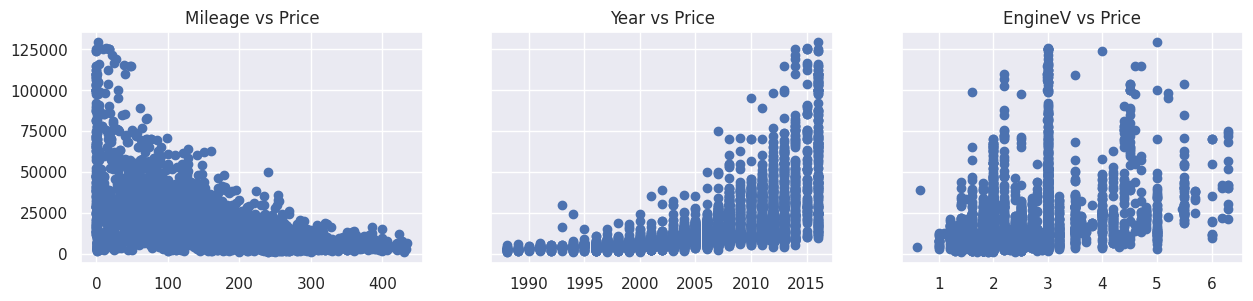

In [ ]:
f , (ax1 , ax2 , ax3) = plt.subplots(1,3 , sharey=True , figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Mileage vs Price')
ax2.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax2.set_title('Year vs Price')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('EngineV vs Price')
plt.show()

In [ ]:
data_cleaned['log_price']=np.log(data_cleaned['Price'])
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


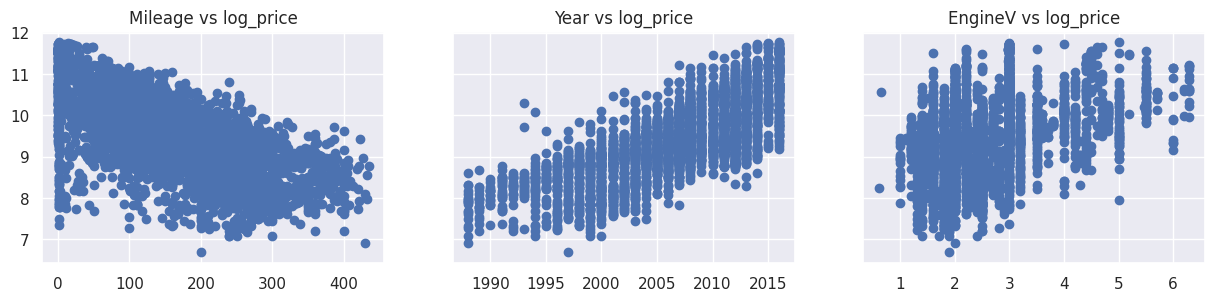

In [ ]:
f , (ax1 , ax2 , ax3) = plt.subplots(1,3 , sharey=True , figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax1.set_title('Mileage vs log_price')
ax2.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax2.set_title('Year vs log_price')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax3.set_title('EngineV vs log_price')
plt.show()

In [ ]:
data_cleaned.drop('Price',axis=1,inplace=True)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


**Multi collinearity**

In [ ]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [ ]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [ ]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!!
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [ ]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


**Create Dummy**

In [ ]:
data_with_dummy=pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_with_dummy

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [ ]:
data_with_dummy.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols=['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
re_arranged_data=data_with_dummy[cols]
re_arranged_data

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [ ]:
x=re_arranged_data.drop("log_price" , axis=1)
y=re_arranged_data["log_price"]

In [ ]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3093, 17)
(774, 17)
(3093,)
(774,)


In [ ]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(xtrain , ytrain)

LinearRegression()

In [ ]:
ypred = line.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"mean_squared_error : {mean_squared_error(ytest , ypred)}")
print(f"mean_absolute_error : {mean_absolute_error(ytest , ypred)}")
print(f"r2_score :{r2_score(ytest , ypred)}")

mean_squared_error : 0.21818269383074426
mean_absolute_error : 0.3294079735987213
r2_score :0.7352752333232253
